In [1]:
import sys
sys.path.append("Pythia8")
sys.path.append("LSD")
sys.path.append("FIT_FUNC")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.optimize import curve_fit
import mplhep as hep
import os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.tri as tri
import matplotlib.scale as mscale
import matplotlib.transforms as mtransforms
from matplotlib.ticker import FuncFormatter, LogLocator, MultipleLocator


In [3]:
# from Pythia8.one_key_run import one_key_run_mass_ctau_br_given_by_csv
# from FIT_FUNC.fit_2D import mH_k_b_fit_linear_check
# from FIT_FUNC.fit_func import fit_linear


In [4]:
from FIT_FUNC.data_read import read_dataframe_single_mass
from FIT_FUNC.fit_func import fit_tau_ln_theta_log10_single_mass_linear, fit_linear

def classify_by_mass(filename):
    df = pd.read_csv(filename)
    grouped = df.groupby('mH')
    #dataframes = {}
    # for value, group in grouped:
    #     dataframes[value] = group #
    return grouped

def mH_theta_log10_tau_ln_2D_function_fit(filename):
    grouped_by_mH = classify_by_mass(filename)
    df = {}
    df_functions = pd.DataFrame()
    for mH, group in grouped_by_mH:

        df[mH] = group
        mass, tau_ln, theta_log10 = read_dataframe_single_mass(df[mH])
        # print(type(mass))
        inter_, coef_, err_square_ = fit_tau_ln_theta_log10_single_mass_linear(tau_ln, theta_log10)
        # print(type(coef_))
        mH = pd.Series(mH)
        inter_ = pd.Series(inter_)
        coef_ = pd.Series(coef_)
        err_square_ = pd.Series(err_square_)
        names = ["mH",
            "k",
            "b",
            "err^2"]
        df_functions_ = pd.concat([mH, coef_, inter_, err_square_], axis = 1, keys = names)
        df_functions =  df_functions._append(df_functions_, ignore_index = True)
    return df_functions

def mH_k_b_fit_linear_check(filename):
    df_functions = mH_theta_log10_tau_ln_2D_function_fit(filename)
    # print(fit_linear(df_functions["mH"].values.reshape(-1, 1), df_functions["k"].values.reshape(-1, 1)))
    k_b, k_k, k_err = fit_linear(df_functions["mH"], df_functions["k"])
    b_b, b_k, b_err = fit_linear(df_functions["mH"], df_functions["b"])
    df_ = pd.DataFrame({
        'intercep_of_m-k': [k_b],
        'slop_of_m-k': [k_k],
        'err_of_m-k': [k_err],
        'intercep_of_m-b': [b_b],
        'slop_of_m-b': [b_k],
        'err_of_m-b': [b_err]
    })
    # print(fit_linear(df_functions["mH"].values.reshape(-1, 1), df_functions["k"].values.reshape(-1, 1)))

    return df_

In [5]:
filename = 'all_DATA_H.csv'
# filename = 'test_m_1theta.csv'
# df = mH_k_b_fit_linear_check(filename)
# df = mH_theta_log10_tau_ln_2D_function_fit(filename)
# df.to_csv('All_mass_k_b.csv')
df = mH_k_b_fit_linear_check(filename)
df.to_csv('Check.csv')

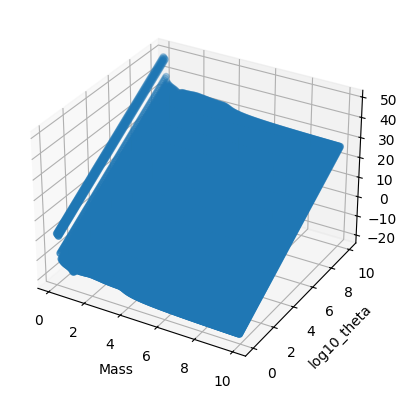

In [6]:
df = pd.read_csv('all_DATA_H.csv')
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['mH'], np.abs(np.log(df['theta'])/np.log(10)), np.log(df['ltime']))
ax.set_xlabel('Mass')
ax.set_ylabel('log10_theta')
# ax.set_zscale('log')
ax.set_zlabel('ln_tau')
plt.show()

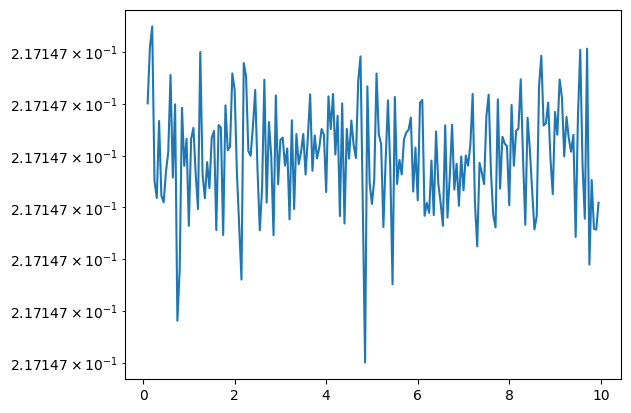

In [24]:
df = pd.read_csv('All_mass_k_b.csv')
plt.figure()
plt.plot(df['mH'], -df['k'])
plt.yscale('log')
plt.show()